In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Assuming the CSV file is named 'capmetro_UT.csv'
df = pd.read_csv('capmetro_UT.csv')

# Explore the dataset to understand its structure and available variables
print(df.head())
print(df.info())

             timestamp  boarding  alighting day_of_week  temperature  \
0  2018-09-01 06:00:00         0          1         Sat        74.82   
1  2018-09-01 06:15:00         2          1         Sat        74.82   
2  2018-09-01 06:30:00         3          4         Sat        74.82   
3  2018-09-01 06:45:00         3          4         Sat        74.82   
4  2018-09-01 07:00:00         2          4         Sat        74.39   

   hour_of_day month  weekend  
0            6   Sep  weekend  
1            6   Sep  weekend  
2            6   Sep  weekend  
3            6   Sep  weekend  
4            7   Sep  weekend  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5824 non-null   object 
 1   boarding     5824 non-null   int64  
 2   alighting    5824 non-null   int64  
 3   day_of_week  5824 non-null   object 
 4   temperature 

### Pair Plots between important variables

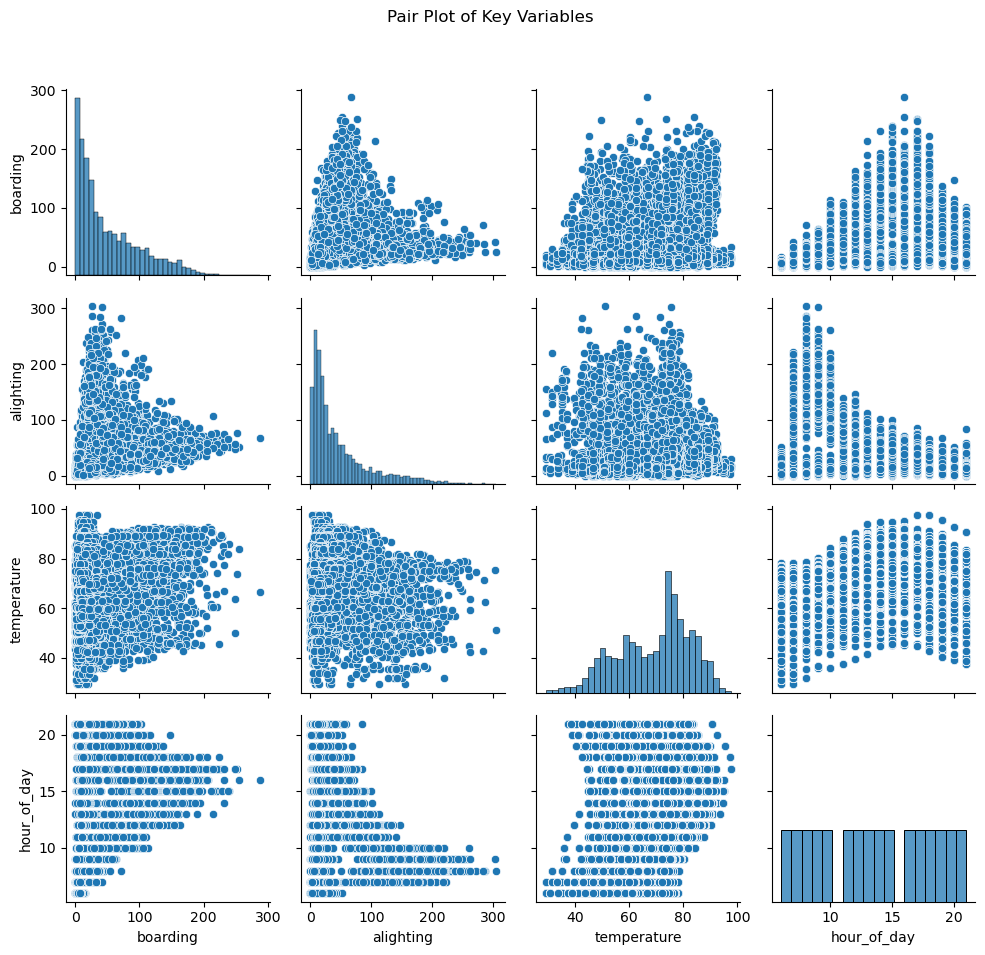

In [19]:
variables = ['boarding', 'alighting', 'temperature', 'hour_of_day', 'month']
sns.pairplot(df[variables])
plt.suptitle("Pair Plot of Key Variables")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Figure Set 1: Ridership Variation with Temperature and Hour of the Day

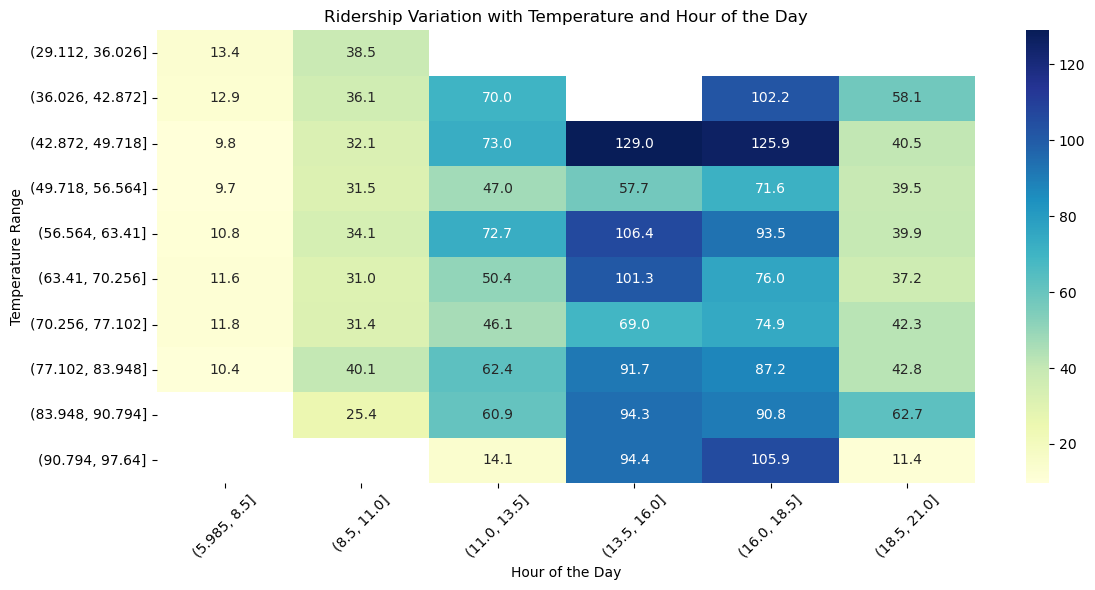

In [24]:
# Bin the temperature values into ranges
temperature_bins = pd.cut(df['temperature'], bins=10)

# Bin the hour of the day values into ranges
hour_bins = pd.cut(df['hour_of_day'], bins=6)

# Create a pivot table with average ridership for each combination of temperature range and hour range
ridership_pivot = df.pivot_table(index=[temperature_bins, hour_bins], values=['boarding'], aggfunc='mean')

# Reshape the pivot table for better visualization
ridership_matrix = ridership_pivot['boarding'].unstack()

# Plotting ridership variation with temperature and hour using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(ridership_matrix, cmap='YlGnBu', annot=True, fmt=".1f")
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature Range')
plt.title('Ridership Boarding Variation with Temperature and Hour of the Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

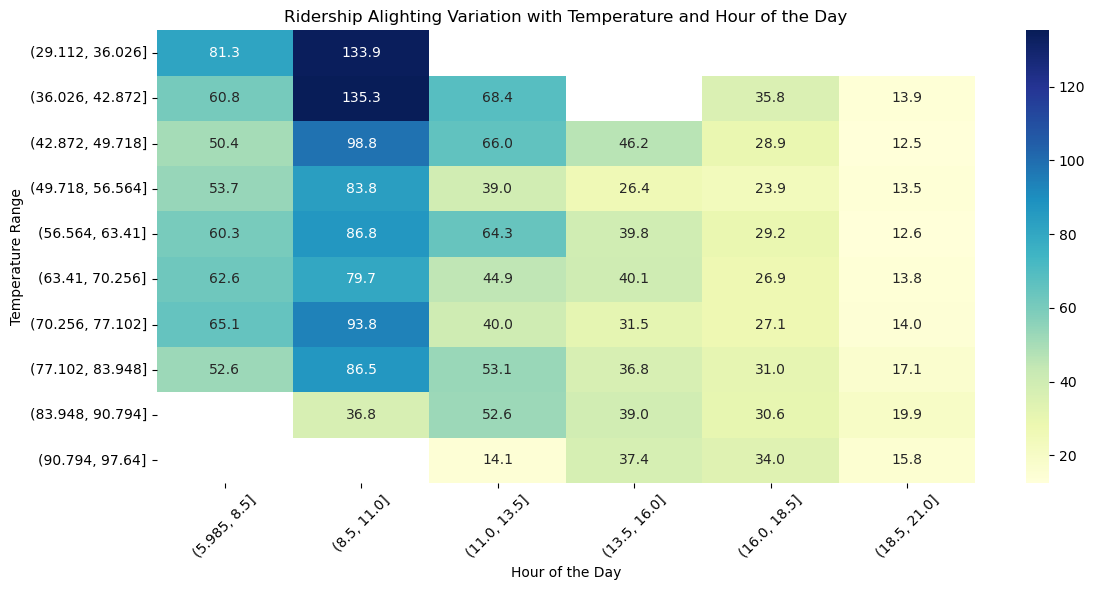

In [26]:
# Bin the temperature values into ranges
temperature_bins = pd.cut(df['temperature'], bins=10)

# Bin the hour of the day values into ranges
hour_bins = pd.cut(df['hour_of_day'], bins=6)

# Create a pivot table with average ridership for each combination of temperature range and hour range
ridership_pivot = df.pivot_table(index=[temperature_bins, hour_bins], values=['alighting'], aggfunc='mean')

# Reshape the pivot table for better visualization
ridership_matrix = ridership_pivot['alighting'].unstack()

# Plotting ridership variation with temperature and hour using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(ridership_matrix, cmap='YlGnBu', annot=True, fmt=".1f")
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature Range')
plt.title('Ridership Alighting Variation with Temperature and Hour of the Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Figure Set 2: Average Ridership with Type v/s Months and Hour of the day

C:\Users\megha\AppData\Local\Temp\ipykernel_25112\1335968146.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='boarding', ci=None)
C:\Users\megha\AppData\Local\Temp\ipykernel_25112\1335968146.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='alighting', ci=None)


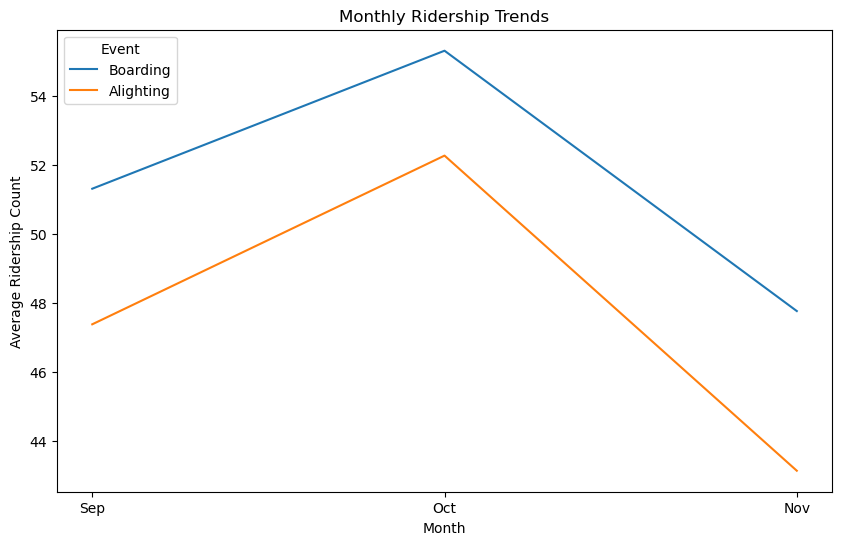

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='boarding', ci=None)
sns.lineplot(data=df, x='month', y='alighting', ci=None)
plt.xlabel('Month')
plt.ylabel('Average Ridership Count')
plt.title('Monthly Ridership Trends')
plt.legend(title='Event', loc='upper left', labels=['Boarding', 'Alighting'])
plt.show()

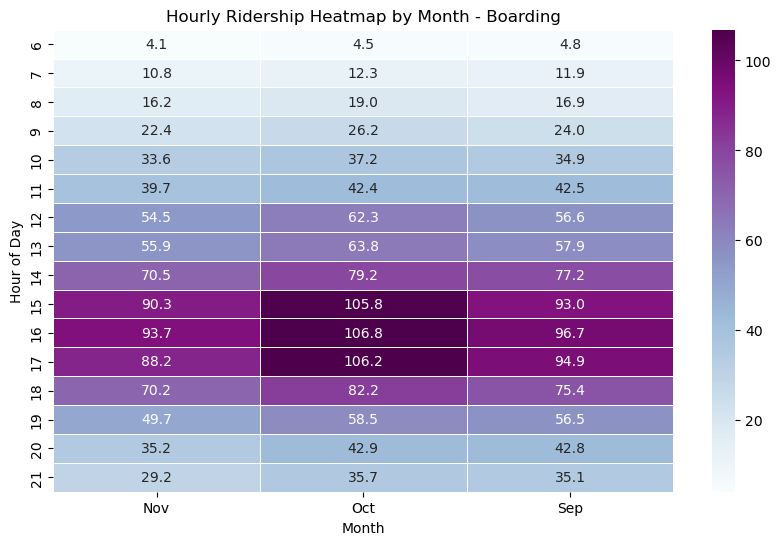

In [30]:
hourly_ridership = df.pivot_table(index='hour_of_day', columns='month', values='boarding', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_ridership, cmap='BuPu', annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel('Month')
plt.ylabel('Hour of Day')
plt.title('Hourly Ridership Heatmap by Month - Boarding')
plt.show()

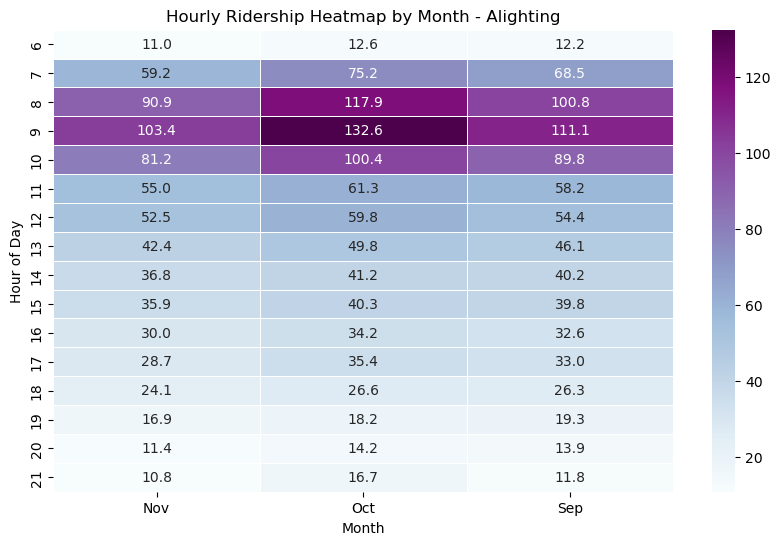

In [29]:
hourly_ridership = df.pivot_table(index='hour_of_day', columns='month', values='alighting', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_ridership, cmap="BuPu", annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel('Month')
plt.ylabel('Hour of Day')
plt.title('Hourly Ridership Heatmap by Month - Alighting')
plt.show()

C:\Users\megha\AppData\Local\Temp\ipykernel_16104\1309356170.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour_of_day', y='boarding', ci=None)
C:\Users\megha\AppData\Local\Temp\ipykernel_16104\1309356170.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour_of_day', y='alighting', ci=None)


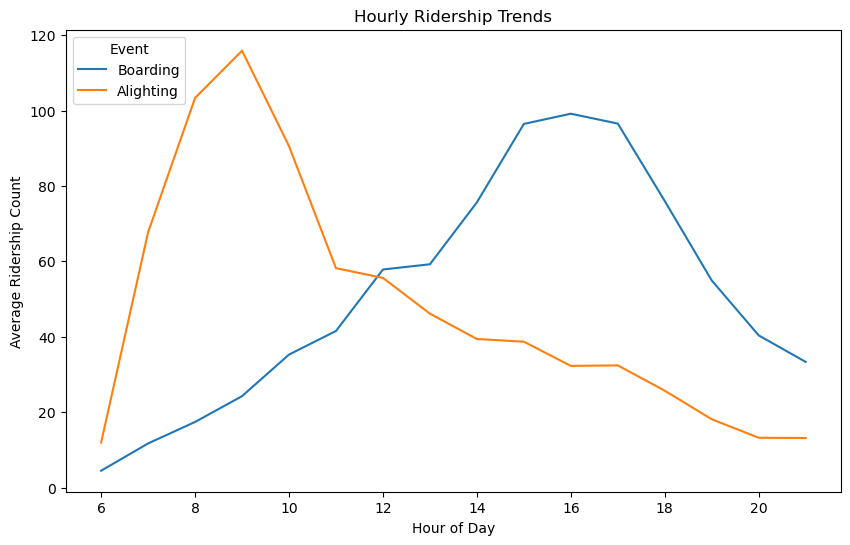

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour_of_day', y='boarding', ci=None)
sns.lineplot(data=df, x='hour_of_day', y='alighting', ci=None)
plt.xlabel('Hour of Day')
plt.ylabel('Average Ridership Count')
plt.title('Hourly Ridership Trends')
plt.legend(title='Event', loc='upper left', labels=['Boarding', 'Alighting'])
plt.show()

### Figure Set 3: Weekend vs. Weekday Ridership by Month/Hour

C:\Users\megha\AppData\Local\Temp\ipykernel_16104\4001759382.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='month', y='boarding', hue='weekend', ci=None)


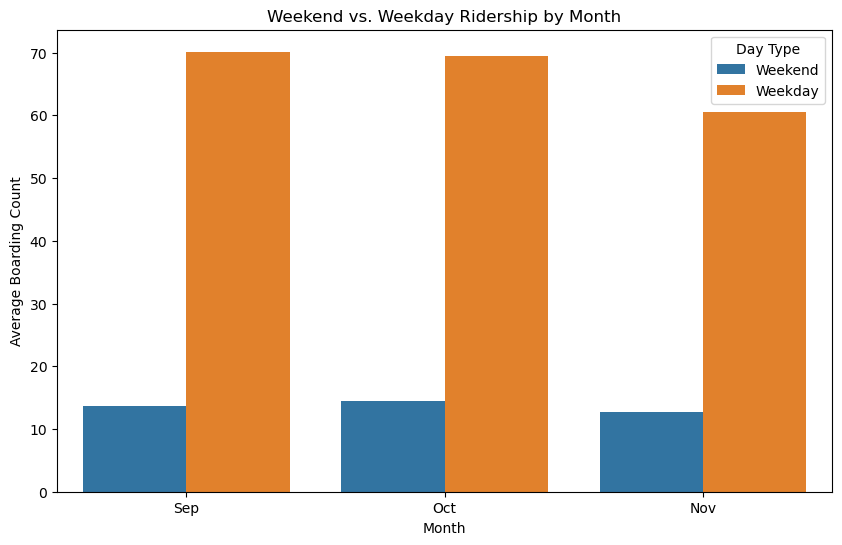

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='month', y='boarding', hue='weekend', ci=None)
plt.xlabel('Month')
plt.ylabel('Average Boarding Count')
plt.title('Weekend vs. Weekday Ridership by Month')
plt.legend(title='Day Type', loc='upper right', labels=['Weekend', 'Weekday'])
plt.show()


C:\Users\megha\AppData\Local\Temp\ipykernel_16104\3505346745.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='month', y='alighting', hue='weekend', ci=None)


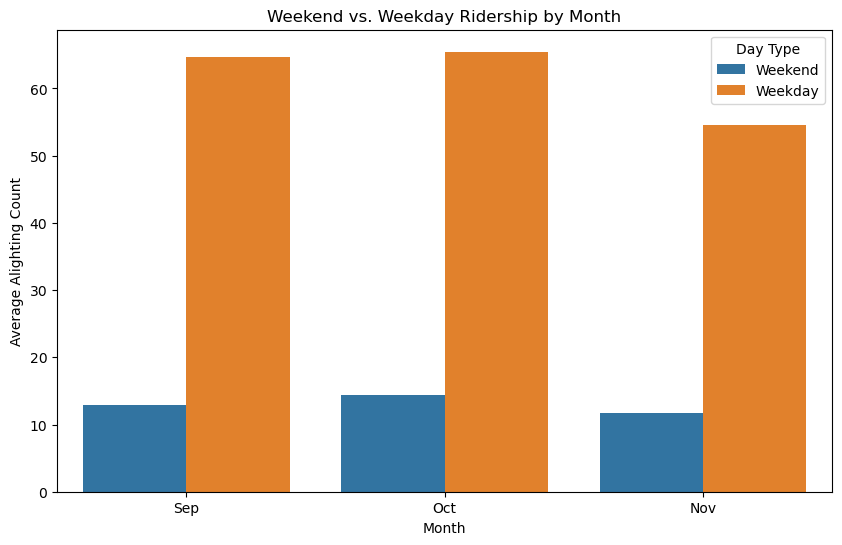

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='month', y='alighting', hue='weekend', ci=None)
plt.xlabel('Month')
plt.ylabel('Average Alighting Count')
plt.title('Weekend vs. Weekday Ridership by Month')
plt.legend(title='Day Type', loc='upper right', labels=['Weekend', 'Weekday'])
plt.show()

### Figure Set 4: Monthly Ridership Trends by Day of Week

C:\Users\megha\AppData\Local\Temp\ipykernel_25112\1596981635.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='boarding', hue='day_of_week', ci=None)


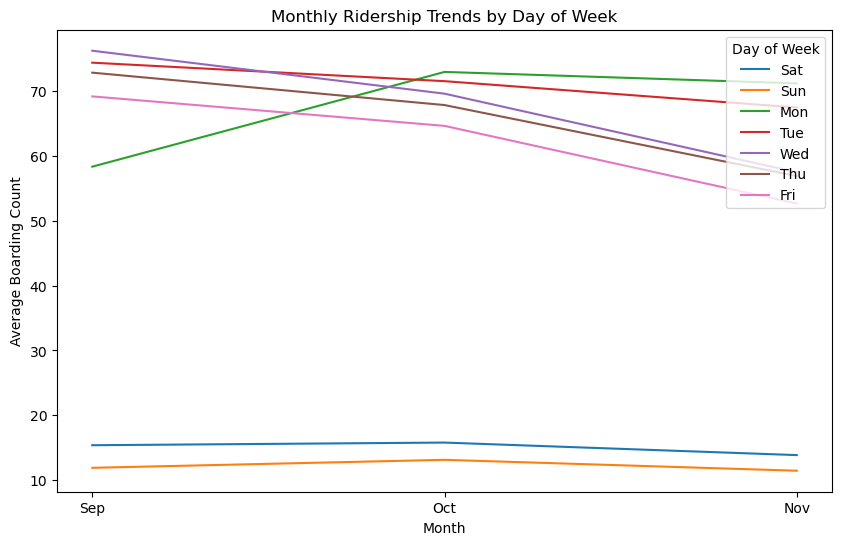

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='boarding', hue='day_of_week', ci=None)
plt.xlabel('Month')
plt.ylabel('Average Boarding Count')
plt.title('Monthly Ridership Trends by Day of Week')
plt.legend(title='Day of Week', loc='upper right')
plt.show()

C:\Users\megha\AppData\Local\Temp\ipykernel_16104\4157703679.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='alighting', hue='day_of_week', ci=None)


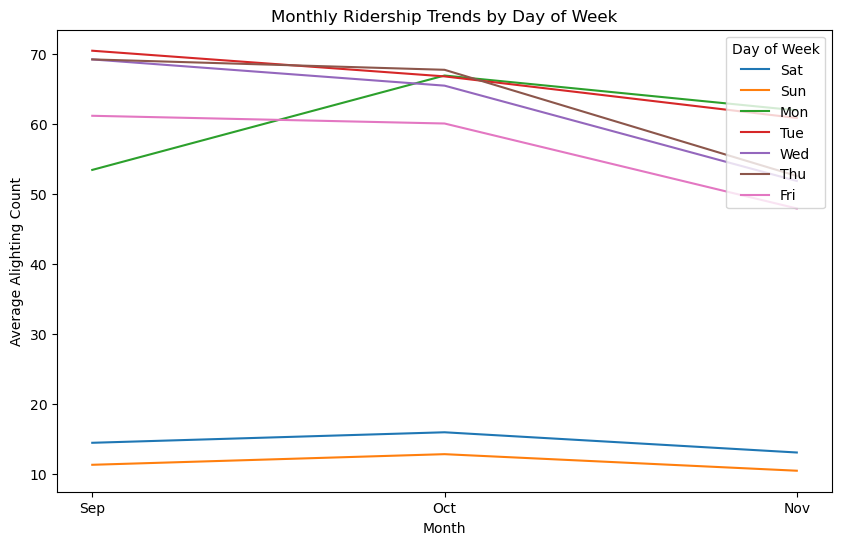

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='alighting', hue='day_of_week', ci=None)
plt.xlabel('Month')
plt.ylabel('Average Alighting Count')
plt.title('Monthly Ridership Trends by Day of Week')
plt.legend(title='Day of Week', loc='upper right')
plt.show()

The boarding and alighting on weekends is considerably lower as compared to weekdays, which makes sense considering students might not come to university those days.
Also Mondays of September we see a lower ridership trend due to various reasons like Weekend Effect, Labor Day Holiday or just the start of the fall semester